## Обращённый маятник. Скользяшие режимы управления

### Белый Глеб

Статья: https://link.springer.com/chapter/10.1007/978-981-10-2374-3_6

### 1 Модель обратного маятника
Рассмотрим классическую модель обратного маятника на тележке, которая может перемещаться вдоль горизонтальной направляющей.
<img src="https://cdn.mathpix.com/snip/images/-Xcex78PHlDxgcSGzhz1ewtaTNxuoaNnHXh4h62HqYk.original.fullsize.png" width="250" height="400">
$$\textbf{Рис. 1} \text{ Схема системы обратного маятника на тележке}$$


Введём следующие обозначения:\
$M$ - масса тележки\
$m$ - масса маятника\
$g$ - ускорение свободного падения\
$l$ - положение центра масс маятника (половина его длины)\
$u$ - управляющее воздействие (внешняя сила, приложенная к тележке)

Система имеет две степени свободы: 
1. $x$ для горизонтального премещения тележки
2. $\theta$ для угла вращения маятника

Пусть $x = \left[ x_1 \:\:\: x_2 \right]^{\text{T}} = \left[ \theta \:\:\: \dot{\theta} \right]^{\text{T}}$ - вектор состояния, а $u$ - сила, приложенная к тележке. Тогда уравнения динамики имеют вид:
\begin{equation}
    \begin{cases}
        \dot{x_1} = x_2 \\
        \dot{x_2} = f(x_1,x_2) + b(x_1,x_2)u
    \end{cases},
\end{equation}
где:
\begin{equation}
    f(x_1,x_2) = \frac{(M+m)g \sin{x_1} - mlx_2^2 \sin{x_1} \cos{x_1}}{\frac{4}{3} (M+m)l - ml \cos^2{x_1}}, \\
    b(x_1,x_2) = \frac{\cos{x_1}}{\frac{4}{3} (M+m)l - ml \cos^2{x_1}}.
\end{equation}

Пусть $M = 1$ кг - масса тележки, $m = 0,1$ кг - масса маятника, $l = 0,5$ м - половина длины маятника, $g = 9,8 \: \text{м}/ \text{c}^2$ - ускорение свободного падения.

### Метод скользящих режимов

В задачах поиска управления методом скользящих режимов на практике встречается проблема чаттеринга (быстрые переключения в рэлейном режиме управления), возникающая из-за отклонений от "правильного" закона управления ввиду технических недостатков управляющих механизмов.

Существует несколько решений этой проблемы, и некоторые из них представлены ниже.

### 2.1 Классический метод скользящих режимов

Рассмотрим некоторую нелинейную систему вида:
$$ \tag{1} \dot{x} = f(x) + b(x) u,$$
где $ x \in R^n$ - вектор состояния системы, $ u \in R$ - управляющее воздействие.


Целевое скользяшее многообразие определяется как:
$$ \tag{2} S = \{ x \in R^n: s = 0\} $$

Для таких систем управляющее воздействие представляют в виде суммы двух слагаемых, определяемых основными подходами в скользящих режимах.\
Первое слагамое соответствует так называемому эквивалентному управлению, которое представляет собой линейную функцию от $x$. Второе слагамое соответствует разрывному управлению.\
Тогда управленние представимо в виде:
$$ u = u_{eq} + u_{d} .$$

При этом $u_{eq}$ находится из условия $ \dot{s} = 0$. Или в применении к уравнению (2):
$$ \dot{s} = \frac{\partial s}{\partial x} \left(f(x) + b(x) u\right) = 0 $$
$$ \tag{3} u_{eq} = -\left(\frac{\partial s}{\partial x} b(x) \right)^{-1} \frac{\partial s}{\partial x} f(x) $$

При этом в методе скользящих режимов важно так называемое условие достижимости. Оно заключается в том, что управление должно привести систему к целевому многообразию за конечное время, что достигается при разныз знаках $s$ и $\dot{s}$ (подробнее см. [1]). Оно записывается в виде:
$$ \tag{4} s\dot{s} \leq - \eta |s|, \quad \eta > 0 $$

Тогда конечное управление определяется как:
$$ \tag{5} u = -\left(\frac{\partial s}{\partial x} b(x) \right)^{-1} \left(\frac{\partial s}{\partial x} f(x) + {k}\cdot \text{sign}(x)\right), $$
где $k$ - некоторая положительная константа, удовлетворяющая неравенству из (3): $ \eta \leq k$.

Также для избежания чаттеринга функция знака ($\text{sign}$) заменяется непрерывной функцией. Примером такой функции может быть функция насыщения:
$$\begin{equation}
\tag{6}
\text{sat}(s,\varphi) = 
 \begin{cases}
 \frac{s}{\varphi}, |\frac{s}{\varphi}|\leq 1
 \\
 \text{sign}(s), |\frac{s}{\varphi}|> 1
 \end{cases}
 \end{equation}$$

In [1]:
import numpy as np
import scipy.integrate as sci
import sympy as sym
import matplotlib.pyplot as plt
from enum import Enum

In [2]:
class Parameters(object):
    pass

params = Parameters()

# параметры физической системы
params.m = 0.1  # масса маятника, кг
params.M = 1    # масса тележки, кг
params.g = 9.81 
params.l = 0.5  # половина длины маятника, м

# параметры скользящего режима 1 порядка
params.lam = 5       
params.k = 18      
params.phi = 0.5        

# параметры скользящего режима 2 порядка
params.km = 7
params.kM = 35
params.w = 8
params.C = 4
params.r = 0.5

sim = Parameters()
sim.t0 = 0
sim.ts = 0.005
sim.tf = 7
sim.t_sol = np.arange(sim.t0, sim.tf, sim.ts)

# типы управления для передачи в разнфе функции
class ControlType(Enum):
    first_order = 1                # скользящий режим первого порядка
    first_order_sat = 2            # скользящий режим первого порядка с наcыщением вместо sign
    second_order_twist = 3         # скользящий режим второго порядка, twisting алгоритм
    second_order_super_twist = 4   # скользящий режим второго порядка, super-twisting алгоритм

### Целевая траектория и начальные условия

Требуемый сигнал (целевая траектория) и начальные условия соответственно
$$\theta(t) = \frac{\pi}{30}\sin{t}, \quad x_0 = \left[0.2 \:\:\: 0\right]^\text{T}$$

In [3]:
class Expressions(object):
    pass

# класс выражений для вычисления функций
exprs = Expressions()

# РЕФЕРЕНСНАЯ ТРАЕКТОРИЯ
t = sym.Symbol('t')
xRef = np.pi/30 * sym.sin(t)
exprs.xRef = sym.lambdify(t, xRef, "numpy")

# продифференцируем референсную траекторию для формул (7), (8), (15)
dxRef = sym.diff(xRef, t)
ddxRef = sym.diff(dxRef, t)
dddxRef = sym.diff(ddxRef, t)

exprs.dxRef = sym.lambdify(t, dxRef, "numpy")
exprs.ddxRef = sym.lambdify(t, ddxRef, "numpy") 
exprs.dddxRef = sym.lambdify(t, dddxRef, "numpy") 

theta = sym.Function('theta')(t)  # угол
omega = sym.Function('omega')(t)  # угловая скорость
gamma = sym.Function('gamma')(t)  # угловое ускорение

# продифференцируем выражения для формулы (15)
f = ((params.m + params.M) * params.g * sym.sin(theta) - params.m * params.l * omega ** 2 * sym.sin(theta) * sym.cos(theta)) / \
     (4/3 * (params.M + params.m) * params.l - params.m * params.l * sym.cos(theta) ** 2)
b = sym.cos(theta) / (4/3 * (params.M + params.m) * params.l - params.m * params.l * sym.cos(theta) ** 2)
exprs.f = sym.lambdify([theta, omega], f, "numpy")
exprs.b = sym.lambdify([theta, omega], b, "numpy") 

# заменим первые производные величинами из вектора состояни
dotF = sym.diff(f, t)
dotB = sym.diff(b, t)

# d_theta/dt = omega
dotF = dotF.subs(sym.Derivative(theta, t), omega) 
dotB = dotB.subs(sym.Derivative(theta, t), omega)
# d_omega/dt = gamma
dotF = dotF.subs(sym.Derivative(omega, t), gamma)
dotB = dotB.subs(sym.Derivative(omega, t), gamma)

exprs.dotF = sym.lambdify([theta, omega, gamma], dotF, "numpy")
exprs.dotB = sym.lambdify([theta, omega, gamma], dotB, "numpy") 

In [4]:
# Функция визуализации

def plotter(sol, exprs, params, control_type):
    theta = sol.y.T[:, 0]
    omega = sol.y.T[:, 1]
    time = sol.t
    
    # вычисление референсных траекторий в данных временных узлах
    thetaRef = np.zeros(len(time))
    for i in range(len(time)):
        thetaRef[i] = exprs.xRef(time[i])
        
    omegaRef = np.zeros(len(time))
    for i in range(len(time)):
        omegaRef[i] = exprs.dxRef(time[i])
    
    # вычисление функции целевого многообразия в заданных временных узлах
    slidingFunc = np.zeros(len(time))
    for i in range(len(time)):
        slidingFunc[i] = calcS(time[i], sol.y.T[i, :], params, exprs)
            
    # вычисление управления в данных временных узлах
    сontrolFunc = np.zeros(len(time))
    if control_type.value == 3:
        for i in range(len(time)):
            сontrolFunc[i] = sol.y.T[i, 2]
    else:
        for i in range(len(time)):
            сontrolFunc[i] = calcControl(time[i], sol.y.T[i, :], params, exprs, control_type)
                
    dotSlidingFunc = np.zeros(len(time))
    for i in range(len(time)):
        dotSlidingFunc[i] = calcDotS(time[i], sol.y.T[i, :], params, exprs, сontrolFunc[i])
    
    plt.figure(figsize=(8,4))
    plt.plot(time, theta)
    plt.plot(time, thetaRef)
    plt.title('Зависимость угла от времени')
    plt.xlabel('t, сек')
    plt.ylabel('$\Theta$, рад')
    plt.grid(True)
    plt.legend(['$\Theta$', '$\Theta_{ref}$'])
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.plot(time, omega)
    plt.plot(time, omegaRef)
    plt.title('Зависимость угловой скорости от времени')
    plt.xlabel('t, сек')
    plt.ylabel('$\omega $, рад/сек')
    plt.grid(True)
    plt.legend(['$\omega$', '$\omega_{ref}$'])
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.plot(time, slidingFunc)
    plt.title('Зависимость значения функции целевого многообразия от времени')
    plt.xlabel('t, сек')
    plt.ylabel('s')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.plot(time, сontrolFunc)
    plt.title('Зависимость управляющего воздействия от времени')
    plt.xlabel('t, сек')
    plt.ylabel('u, Н')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.plot(slidingFunc, dotSlidingFunc)
    plt.title('Фазовый портрет $s, \dot{s}$')
    plt.xlabel('s')
    plt.ylabel('$\dot{s}$')
    plt.grid(True)
    plt.show()

In [5]:
# Функция для расчёта закона управления

def calcControl(time, x, params, exprs, control_type, angAcc = 0):

    s = calcS(time, x, params, exprs)
    dedt = x[1] - exprs.dxRef(time)
    
    f = exprs.f(x[0], x[1])
    b = exprs.b(x[0], x[1])
    
    h = params.lam * dedt + (f - exprs.ddxRef(time))
    
    if control_type.value == 1:
        u = - (h + params.k * np.sign(s)) / b # формула (9)
    
    elif control_type.value == 2:
        u = - (h + params.k * sat(params.phi, s)) / b # формула (10)
    elif control_type.value == 3:
        # в данном случае возвращается правая часть дифф. уравнения для управления 
        dotS = calcDotS(time, x, params, exprs, x[2])
        
        # формула (14)
        if s * dotS > 0:
            dot_u_tw = -params.kM * np.sign(s)
        else:
            dot_u_tw = -params.km * np.sign(s)
            
        dotB = exprs.dotB(x[0], x[1], angAcc)
        dotF = exprs.dotF(x[0], x[1], angAcc)
        ddxRef = exprs.ddxRef(time)
        dddxRef = exprs.dddxRef(time)
        d = params.lam * (f + b * x[2] - ddxRef) + (dotF + dotB * x[2] - dddxRef)
                    
        u = (-d + dot_u_tw) / b # формула (15)

    elif control_type.value == 4:        
        u_st = - params.C * abs(s)**(params.r) * np.sign(s) + x[2] # формула (17)
        u = (- h + u_st) / b
    else:
        u = 0

    return u

### Скользящий режим первого порядка

Выберем скользящую переменную как 
$$\tag{7} s = \lambda e + \dot{e},$$ 
где $e = \theta - \theta_{ref}$, а $\lambda$ - положительная константа. 

Первая производная $s$ по времени равна:
$$ \tag{8} \dot{s} = \lambda(\omega - \dot{\theta}_{ref}) + (f - \ddot{\theta}_{ref}) + bu = h + bu$$

Тогда с учетом (5) и (7) закон управления для регулятора скользящего режима выражается как:
$$ \tag{9}u = -\frac{h + {k}\cdot \text{sign}(s)}{b}$$

Для расчётов примем значения $\lambda = 5, \quad k = 18$. 

In [6]:
# Вспомогательные функции
def sat(phi, s):
    # формула (6)
    if abs(s / phi) > 1:
        sat = np.sign(s)
    else:
        sat = s / phi
    return sat

def calcS(time, x, params, exprs):
    # формула (7)
    e = x[0] - exprs.xRef(time)
    dedt = x[1] - exprs.dxRef(time)
    s = e * params.lam + dedt
    return s

def calcDotS(time, x, params, exprs, u):
    # формула (8)
    e = x[0] - exprs.xRef(time)
    dedt = x[1] - exprs.dxRef(time)
    
    f = exprs.f(x[0], x[1])
    b = exprs.b(x[0], x[1])
    h = params.lam * dedt + (f - exprs.ddxRef(time))
    
    dotS = h + b * u
    
    return dotS

In [7]:
def rhsFirstOrder(t, x, params, exprs, controlOption):
     
    control = calcControl(t, x, params, exprs, controlOption)
    
    f = exprs.f(x[0], x[1])
    b = exprs.b(x[0], x[1])
    
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = f + control * b

    return dxdt

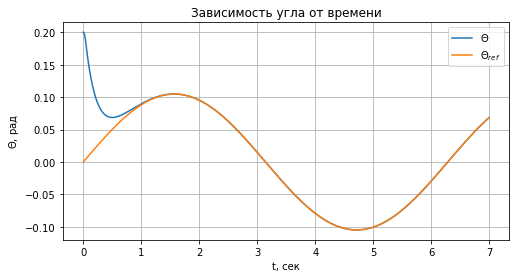

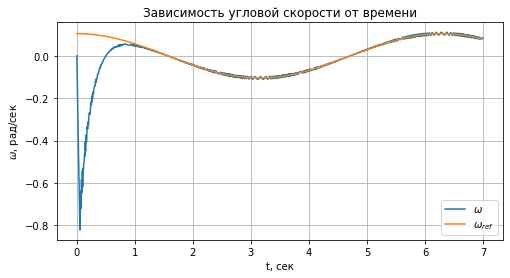

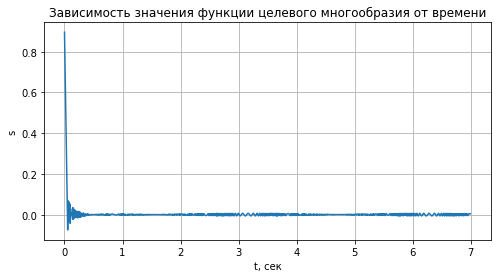

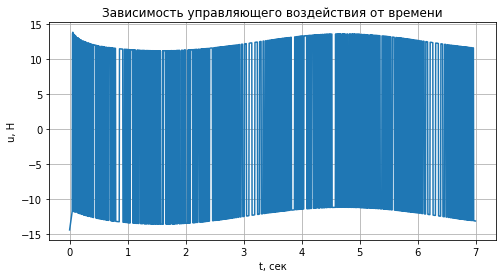

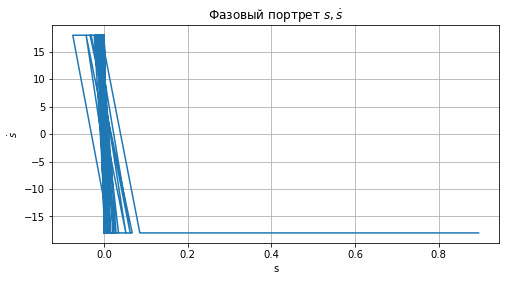

In [8]:
control_type = ControlType.first_order

x0_first_order = np.array([0.2, 0])    # Начальные условия

sol_first_order = sci.solve_ivp(lambda t, x: rhsFirstOrder(t, x, params, exprs, control_type), \
                     [sim.t0, sim.tf], x0_first_order, t_eval = sim.t_sol)

plotter(sol_first_order, exprs, params, control_type)

### Траектория системы с управлением в  режиме первого порядка с гладкой функцией смены знака

Для уменьшения чаттеринга воспользуемся (6):
$$ \tag{10} u = -\frac{h + {k}\cdot\text{sat}(s, \varphi)}{b}$$

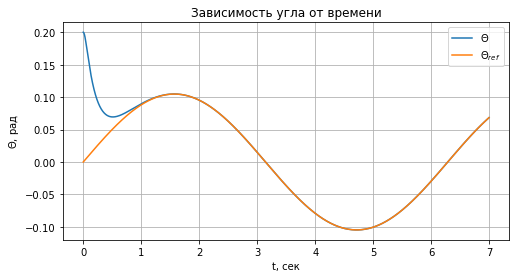

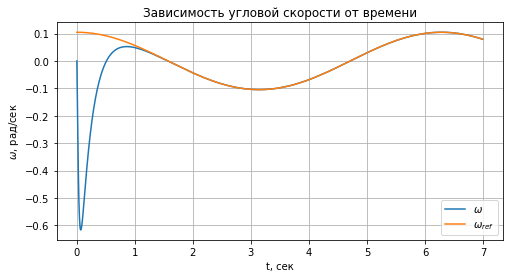

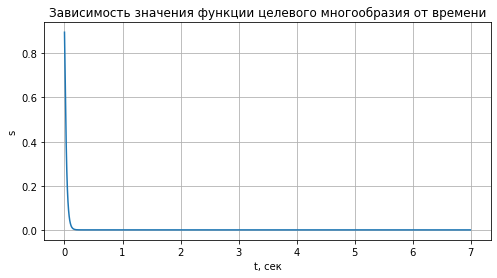

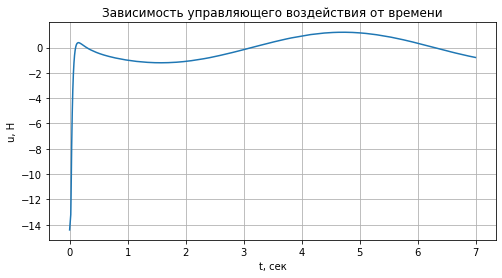

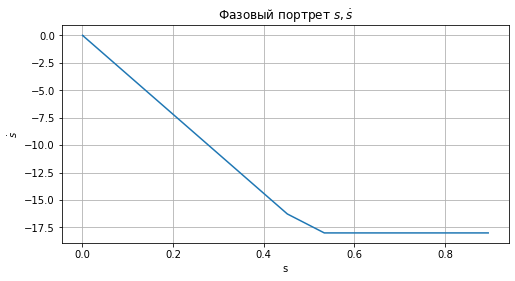

In [9]:
control_type = ControlType.first_order_sat

x0_first_order_sat = np.array([0.2, 0])    # Начальные условия

sol_first_order_sat = sci.solve_ivp(lambda t, x: rhsFirstOrder(t, x, params, exprs, control_type), \
                     [sim.t0, sim.tf], x0_first_order_sat, t_eval = sim.t_sol)

plotter(sol_first_order_sat, exprs, params, control_type)

### Скользящие режимы второго порядка

Скользящие режимы второго порядка накладывают более строгие ограничения на целевые многообразия:
$$ \begin{equation}\tag{11}
 S^2 = \{ x \in R^n: s = \dot{s} = 0\} 
\end{equation}$$

Тогда аналогично подходу в (3) продифференцируем $s$ и приравняем к 0:
$$ \tag{12} \ddot{s} = \frac{\partial \dot{s}}{\partial x} (f(x) + b(x) u) + \frac{\partial \dot{s}}{\partial u}\dot{u} =  \alpha (x) + \beta(x) \dot{u} = 0 $$

При этом на функции накладываются ограничения:
$$ \tag{13}|\alpha(x)| < F,$$
$$ G_m \leq \beta(x) \leq G_M ,$$
где $F, G_m, G_M$ - некоторые положительные константы.

### Twisting алгоритм

Алгоритм имеет такое название, т.к. траектория системы в фазовом пространстве $(s, \dot{s})$ "скручивается" вокруг начала координат (Рис. 2)
<img src="https://cdn.mathpix.com/snip/images/s07Sb7PkPB-MpBIKTkQl5yUf_XWWLE59ap9aglmo6AY.original.fullsize.png" width="250" height="400">
$$\textbf{Рис. 2} \text{ Фазовая траектория алгоритма скручивания}$$

Подход основан на том, что некоторый управляющий знакопеременный член $ u_{tw}$ "сводит" систему с управлением вида (5) к равенству $\dot{s} = 0$. Это позволяет привести систему к целевому многообразию (11) за счет добавления эволюционирующего члена к закону управления, полученному для режима первого порядка(подробнее см. [2])

В этом случае управление можно выбрать как:
$$ \tag{14}\dot{u} = -\left(\frac{\partial \dot{s}}{\partial x} \right)^{-1}\left(\frac{\partial \dot{s}}{\partial x} \alpha(x) + u_{tw}\right) $$
$$\begin{equation}
\dot{u}_{tw} = 
 \begin{cases}
 -k_m \text{sign}(s), \quad s \dot{s} \leq 0
 \\
 -k_M \text{sign}(s), \quad s  \dot{s}> 0
 \end{cases}
 \end{equation}$$
 
 Здесь константы $ k_m, k_M$ выбираются из условия сходимости за конечное время.

### Траектория системы с управлением в режиме twisting

С учетом (8):
$$ \ddot{s} = \lambda(f + bu - \ddot{\theta}_{ref}) + (\dot{f} + \dot{b} u - \dddot{\theta}_{ref}) + b\dot{u} = d + b\dot{u}$$

Тогда управление с учетом (13), (14):
$$ \tag{15}\dot{u} = \frac{-d + \dot{u}_{tw}}{b}$$

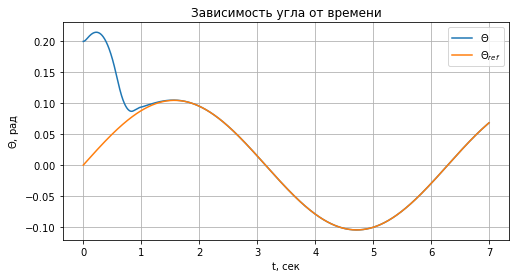

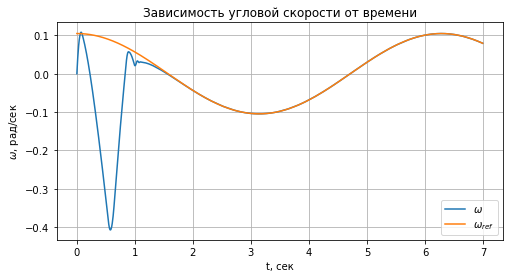

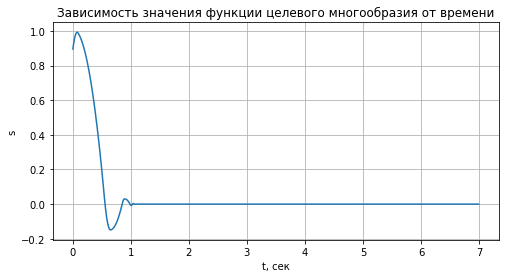

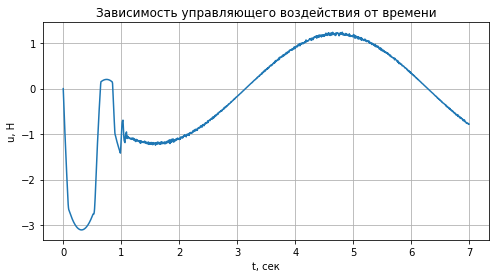

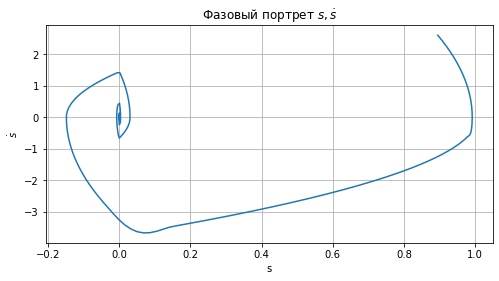

In [10]:
# Интегрирование режимов второго порядка
def rhs_twist(t, x, params, exprs, control_type):
    f = exprs.f(x[0], x[1])
    b = exprs.b(x[0], x[1])
    
    control = x[2]

    dxdt = np.zeros(3)
    dxdt[0] = x[1]
    dxdt[1] = f + control * b
    dxdt[2] = calcControl(t, x, params, exprs, control_type, dxdt[1]) # интегрирование управления из уравнения (15)
    
    return dxdt

control_type = ControlType.second_order_twist

x0_twist = np.array([0.2, 0, 0])

sol_twist = sci.solve_ivp(lambda t, x: rhs_twist(t, x, params, exprs, control_type), \
                          [sim.t0, sim.tf], x0_twist, t_eval = sim.t_sol)

plotter(sol_twist, exprs, params, control_type)

### Super-twisting алгоритм
Этот алгоритм не требует вычисления производных функции $s$.
Закон управления определяется как:
$$ \tag{16} u_{st} = - C |s|^{r}sign(s) + u_1, $$

$$ \dot{u_1} = - w sign(s) ,$$
где константы $C, w$ выбираются из условий сходимости (13)


Управление с учетом (16):
$$ \tag{17}u  = \frac{-h + u_{st}}{b}$$

In [ ]:
def rhs_super_twist(t, x, params, exprs, control_type):
    f = exprs.f(x[0], x[1])
    b = exprs.b(x[0], x[1])
    s = calcS(t, x, params, exprs)

    control = calcControl(t, x, params, exprs, control_type)
    dxdt = np.zeros(3)
    dxdt[0] = x[1]
    dxdt[1] = f + control * b
    dxdt[2] = - params.w * np.sign(s) # интгерирование добавки к управлению из формулы (16)
    
    return dxdt

control_type = ControlType.second_order_super_twist

x0_super_twist = np.array([0.2, 0, 0]) 

sol_super_twist = sci.solve_ivp(lambda t, x: rhs_super_twist(t, x, params, exprs, control_type), \
                     [sim.t0, sim.tf], x0_super_twist, t_eval = sim.t_sol)

plotter(sol_super_twist, exprs, params, control_type)

#### Основная статья:
[Jedda, Olfa & Ghabi, Jalel & Douik, Ali. (2017). Sliding Mode Control of an Inverted Pendulum.](https://link.springer.com/chapter/10.1007/978-981-10-2374-3_6)
#### Ссылки:
1. [Bandyopadhyay, B. & Deepak, Fulwani. (2009). Sliding mode control using novel sliding surfaces.](https://link.springer.com/book/10.1007/978-3-642-03448-0) 
2. [Levant, Arie & Levantovsky, L.. (1993). Sliding Order and Sliding Accuracy in Sliding Mode Control. International Journal of Control - INT J CONTR. 58. 1247-1263.](https://doi.org/10.1080/00207179308923053)  
3. [Krimpmann C., Sliding Mode Control of Mechatronic Systems - From robust control towards self-tuning control with experimental investigations on hydraulic valves. DISSERTATION](https://eldorado.tu-dortmund.de/bitstream/2003/37149/1/Dissertation_Druckversion_stand2018_08_16_pdfA.pdf)